# Bike Sharing Assignment

### Submitted by Shweta AT

### Problem Statement:
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario.In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

<b>The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands

<b>Goal:

1. Develop a model to find the variables which are significant the demand for shared bikes with the available independent variables.
2. It will be used by the management to understand and manipulate the business strategy to meet the demand levels and meet the customer's expectations.

# 1. Importing Libraries

In [1]:
# importing the required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

# 2. Reading Dataset and Understanding the data

In [2]:
# Read the csv file using pandas

bikeSharing_df = pd.read_csv('day.csv')

In [3]:
# Inspecting first few rows

bikeSharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# checking the shape

bikeSharing_df.shape

(730, 16)

In [5]:
# checking dataframe for null and datatype 
bikeSharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# check the details of numerical data

bikeSharing_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
#check the columns of data

bikeSharing_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
#check the size of data

bikeSharing_df.size

11680

In [9]:
#check the datatypes of data

bikeSharing_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [10]:
#check the axes of data

bikeSharing_df.axes

[RangeIndex(start=0, stop=730, step=1),
 Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
        'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
        'casual', 'registered', 'cnt'],
       dtype='object')]

In [11]:
#check the dimensions of data
bikeSharing_df.ndim

2

In [12]:
#check the values of data

bikeSharing_df.values

array([[1, '01-01-2018', 1, ..., 331, 654, 985],
       [2, '02-01-2018', 1, ..., 131, 670, 801],
       [3, '03-01-2018', 1, ..., 120, 1229, 1349],
       ...,
       [728, '29-12-2019', 1, ..., 159, 1182, 1341],
       [729, '30-12-2019', 1, ..., 364, 1432, 1796],
       [730, '31-12-2019', 1, ..., 439, 2290, 2729]], dtype=object)

In [13]:
#Print null counts by column

bikeSharing_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

<b>There are 730 rows and 16 columns in the dataset and there are no null values in the any of the columns.

In [14]:
# renaming few columns for better readibility

bikeSharing_df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [15]:
bikeSharing_df.describe()

,instant,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# 3. Data Cleaning

## 3.1 Remove the unused columns for analysis:

1. "instant" serves only as a row identifier.
2. "dteday" is redundant since we already have date features like "mnth", "year", and "weekday". Additionally, daily trends in bike demand will not be considered for this analysis.
3. "casual" and "registered" variables won't be available at the time of prediction and their sum trivially describes the target variable "cnt", potentially causing data leakage.

In [16]:
#Before dropping date, let us introduce a days_old variable which indicates how old is the business

bikeSharing_df['days_old'] = (pd.to_datetime(bikeSharing_df['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [17]:
# droping unused columns from the dataset

bikeSharing_df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [18]:
#Inspect data frame after dropping

bikeSharing_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt,days_old
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [19]:
bikeSharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   year        730 non-null    int64  
 2   month       730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  days_old    730 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 74.3 KB


In [20]:
bikeSharing_df.season.value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [21]:
bikeSharing_df.weathersit.value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [22]:
bikeSharing_df.corr()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt,days_old
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,0.004012,0.017868,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584,0.413587
year,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,0.000685,-0.011852,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728,0.866026
month,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,-0.004059,-0.010414,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191,0.498251
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.020145,-0.257009,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764,0.016275
weekday,4.012478e-03,6.852851e-04,-4.059002e-03,-0.020145,1.000000,0.001588,0.034216,0.044876,0.037964,0.008780,-0.017230,0.036183,-0.001182
workingday,1.786841e-02,-1.185197e-02,-1.041372e-02,-0.257009,0.001588,1.000000,-0.026332,0.002044,0.010657,0.053770,-0.002453,-0.027640,-0.015171
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.034216,-0.026332,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929,-0.021862
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,0.044876,0.002044,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044,0.150738
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,0.037964,0.010657,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685,0.152773
humidity,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,0.008780,0.053770,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543,0.016080


><b>Insights:

It appears that certain features such as "season," "month," "weekday," and "weathersit" are represented as integers when they should be categorical variables.

## 3.2 Handling Missing Values

In [23]:
#Print null counts by column

bikeSharing_df.isnull().sum()

season        0
year          0
month         0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
humidity      0
windspeed     0
cnt           0
days_old      0
dtype: int64

><b>Insight: No missing/null values present in the dataset

## 3.3 Checking for Duplicates

In [24]:
# Copying the dataframe into new

bikeSharing_df_copy = bikeSharing_df.copy()

# dropping the duplicates

bikeSharing_df_copy.drop_duplicates(inplace=True)

# re-verifying the shape of new dataframe

bikeSharing_df_copy.shape

(730, 13)

In [25]:
# Checking the shape of original dataframe

bikeSharing_df.shape

(730, 13)

><b>Insights: As the shape is same after dropping duplicates, that means there are no duplicates in the original dataframe.

## 3.4 Handling Outliers

In [26]:
bikeSharing_df.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'cnt',
       'days_old'],
      dtype='object')

In [27]:
#Print number of unique values in all columns

bikeSharing_df.nunique()

season          4
year            2
month          12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
humidity      594
windspeed     649
cnt           695
days_old      730
dtype: int64

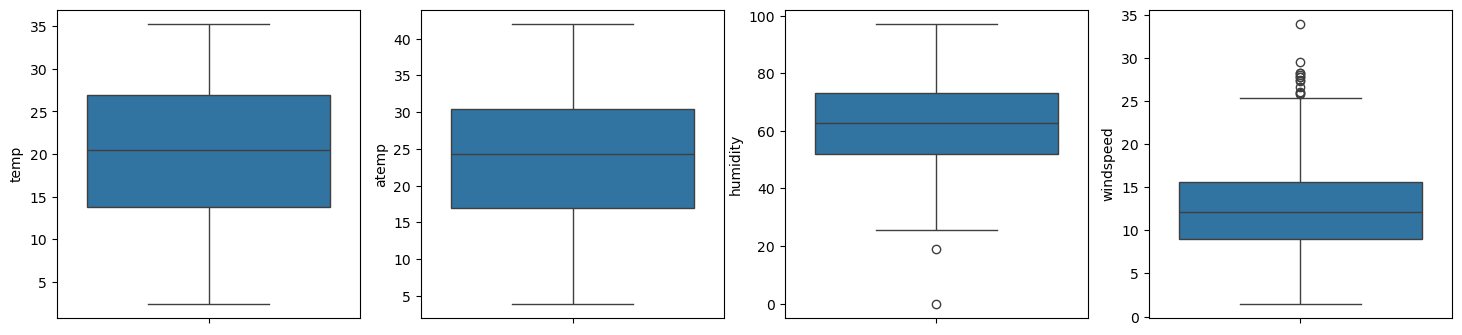

In [28]:
# Box plots for independent variables with continuous values

cols = ['temp', 'atemp', 'humidity', 'windspeed']

plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bikeSharing_df)
    i+=1 


><b> Insights: From the plots, we can tell that there are no outliers to be handled.

# 4. EDA

## 4.1 Converting to categorical types

In [29]:
season_mapping = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}

# Mapping categorical values to integers
bikeSharing_df['season'] = bikeSharing_df['season'].map(season_mapping)


month_mapping = {1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'}

# Mapping categorical values to integers
bikeSharing_df['month'] = bikeSharing_df['month'].map(month_mapping)


weekday_mapping = {0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'}

# Mapping categorical values to integers
bikeSharing_df['weekday'] = bikeSharing_df['weekday'].map(weekday_mapping)


weathersit_mapping = {1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'}

# Mapping categorical values to integers
bikeSharing_df['weathersit'] = bikeSharing_df['weathersit'].map(weathersit_mapping)

In [30]:
bikeSharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  days_old    730 non-null    int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 74.3+ KB


In [31]:
bikeSharing_df

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt,days_old
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,dec,0,fri,1,Misty,10.420847,11.33210,65.2917,23.458911,2114,725
726,spring,1,dec,0,sat,0,Misty,10.386653,12.75230,59.0000,10.416557,3095,726
727,spring,1,dec,0,sun,0,Misty,10.386653,12.12000,75.2917,8.333661,1341,727
728,spring,1,dec,0,mon,1,Clear,10.489153,11.58500,48.3333,23.500518,1796,728


In [32]:
bikeSharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  days_old    730 non-null    int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 74.3+ KB


## 4.2 Visualising the Data

### 4.2.1 For Numerical Variables

<Figure size 1500x3000 with 0 Axes>

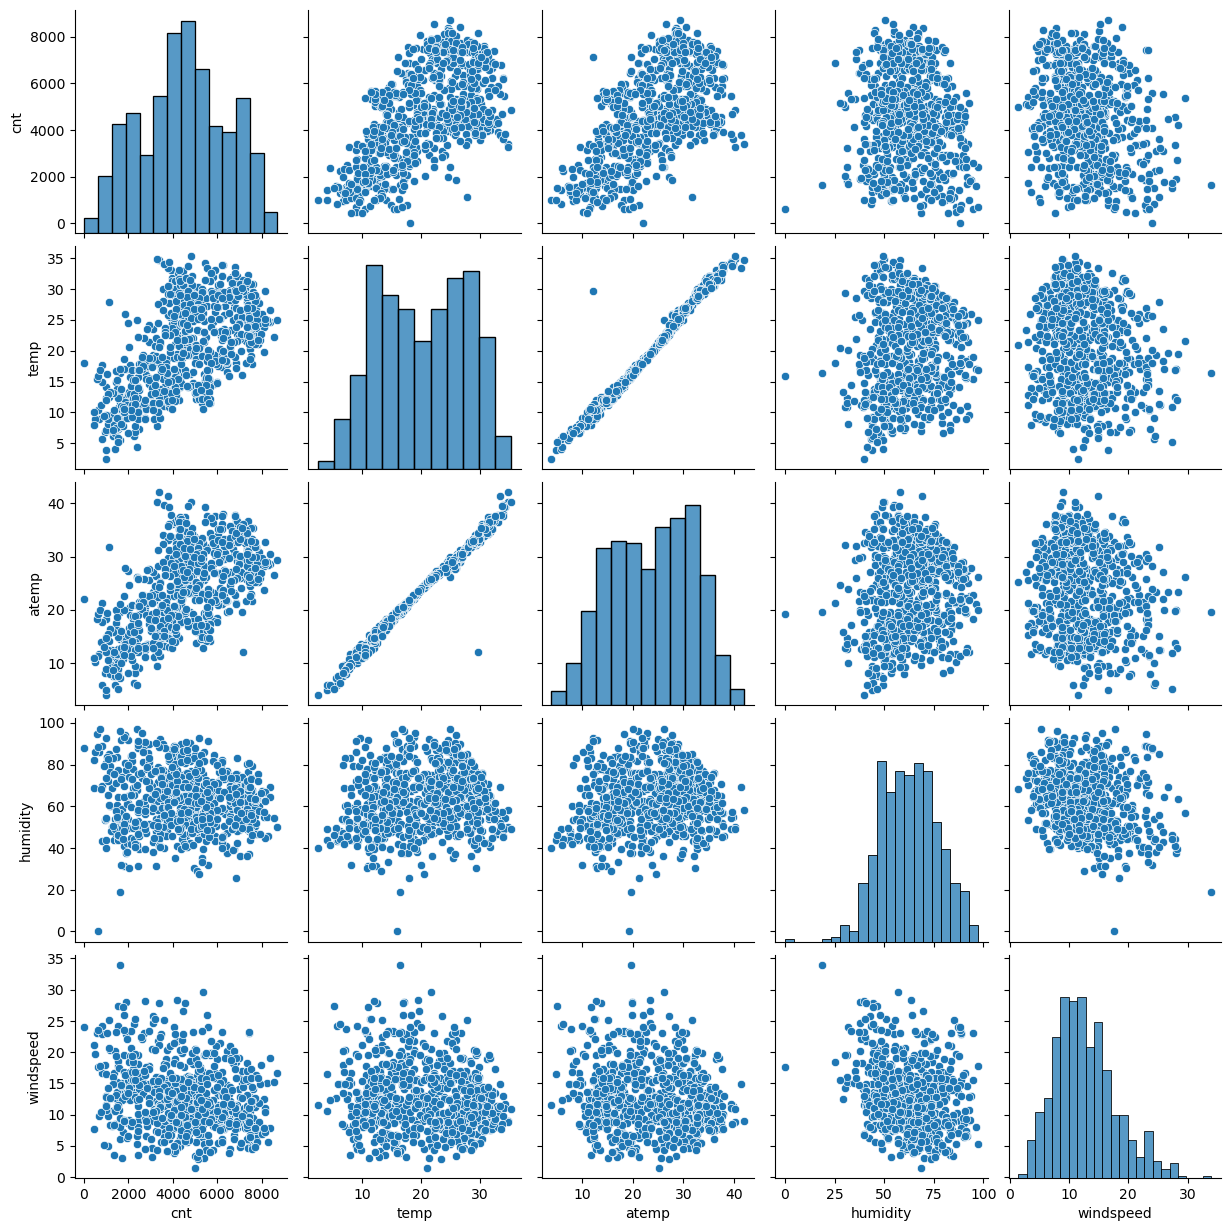

In [33]:
# Plotting pairplots for continuous numeric variables

plt.figure(figsize = (15,30))
sns.pairplot(data=bikeSharing_df,vars=['cnt', 'temp', 'atemp', 'humidity','windspeed'])
plt.show()

><b>Insights:</b>

1. The variables "temp" and "atemp" display the highest correlation with the target variable "cnt," suggesting a significant influence on bike demand.
2. Both "temp" and "atemp" exhibit a strong positive correlation, indicating their close relationship in influencing the target variable.

<b>From the correlation map, it is evident that the target variable shows a clear linear relationship with "temp" and "atemp," underscoring their importance in predicting bike demand.

In [34]:
bikeSharing_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt,days_old
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,4


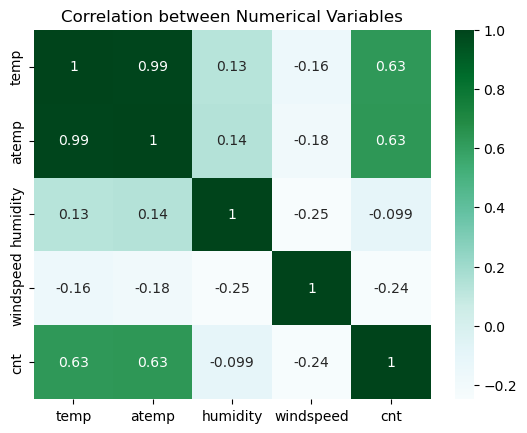

In [35]:
# Checking the correlation between the numerical variables

sns.heatmap(bikeSharing_df[['temp','atemp','humidity','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.title("Correlation between Numerical Variables")
plt.show()

><b>Insights:</b>

In this analysis, we observe that the "temp" and "atemp" variables exhibit a correlation of more than .99, indicating a highly correlated relationship. Since "atemp" appears to be derived from "temp," we can safely drop the "atemp" field at this stage.

### 4.2.2 For Categorical Variables

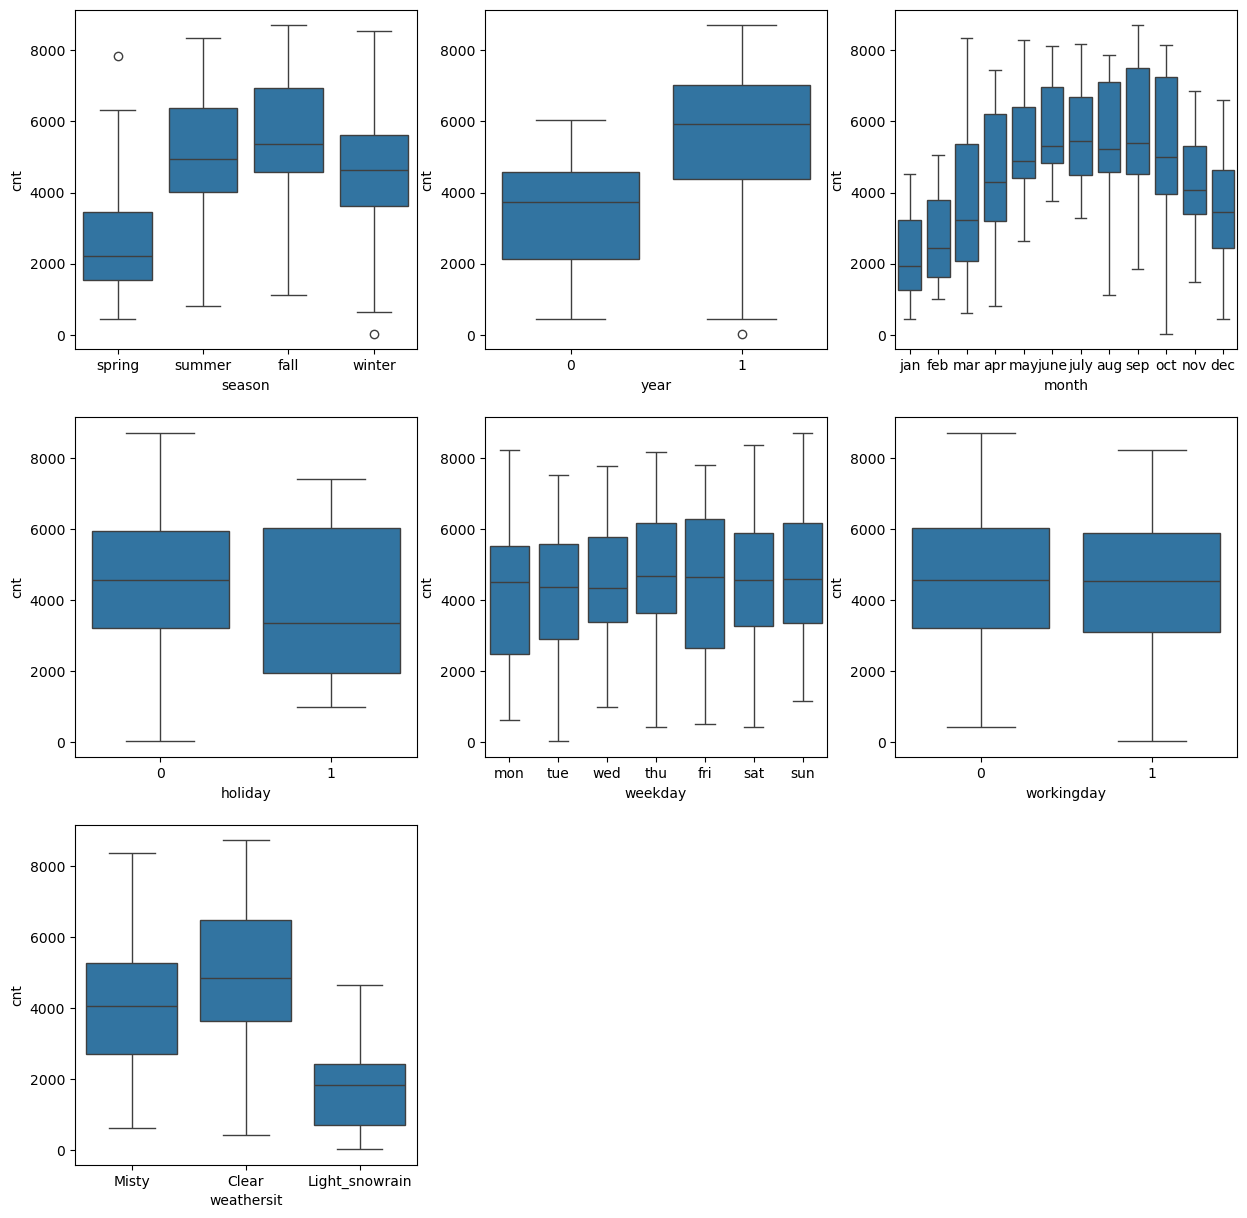

In [36]:
# Boxplot for categorical variables to see demands

vars_cat = ['season','year','month','holiday','weekday','workingday','weathersit']
target_var = 'cnt'

plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bikeSharing_df, x=i[1], y=target_var)
plt.show()

><b> Insights: </b>
1. Seasonal Demand: Fall (Season 3) registers the highest demand for rental bikes.
2. Yearly Growth: A noticeable uptrend in demand is evident for the following year.
3. Monthly Trends: Demand steadily increases each month until June, with September recording the peak demand. Subsequently, demand begins to decline.
4. Holiday Impact: Demand tends to decrease during holidays.
5. Weekday Influence: Weekday patterns do not provide a clear indication of demand trends.
6. Weather Condition Effect: Clear weather conditions coincide with the highest demand.
7. Seasonal Variations: Bike sharing activity peaks during September, while it decreases towards the year-end and beginning, possibly due to extreme weather conditions.

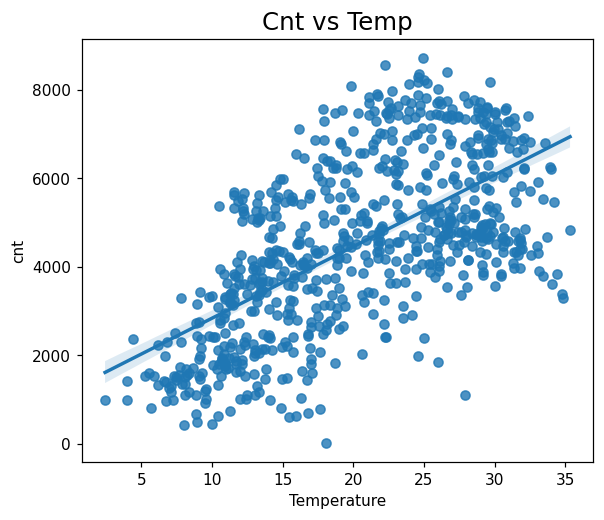

In [37]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=bikeSharing_df,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

><b>Insights:</b>

The demand for bikes exhibits a positive correlation with temperature. It's evident from the data that the bike count ("cnt") shows a linear increase with temperature, indicating a clear linear relationship between these variables.

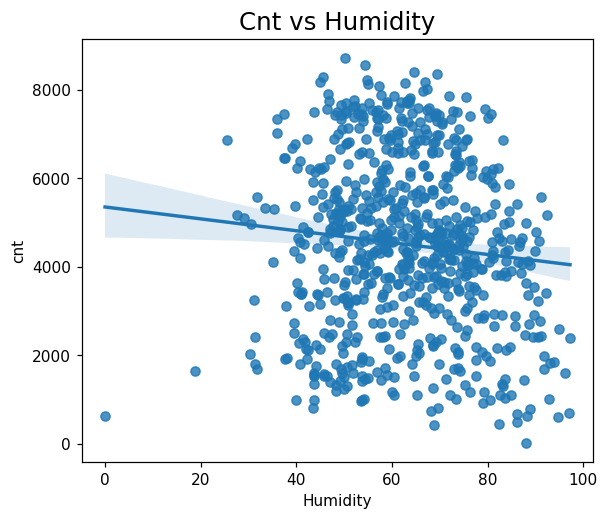

In [38]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Humidity",fontsize=16)
sns.regplot(data=bikeSharing_df,y="cnt",x="humidity")
plt.xlabel("Humidity")
plt.show()

><b>Insights:</b>

While the values for humidity ("hum") appear more scattered, there is an observable trend where the bike count ("cnt") tends to decrease with an increase in humidity.

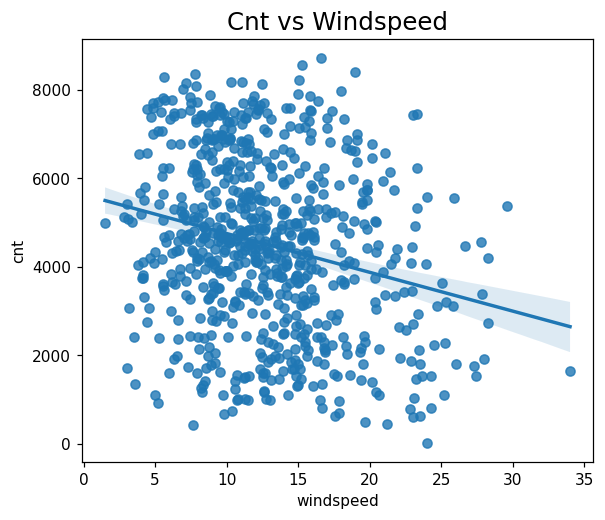

In [39]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=bikeSharing_df,y="cnt",x="windspeed")
plt.show()

><b>Insights:</b>

The windspeed values exhibit considerable variability. However, there is a discernible pattern where the bike count ("cnt") tends to decrease as windspeed increases, despite the scattered distribution of windspeed values.

In [40]:
# function to create barplot related to categorical columns

def plot_cat_columns(column):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.barplot(x=column, y='cnt', data=bikeSharing_df)
    plt.title('Bike Count vs. ' + column.capitalize())
    
    plt.subplot(1, 2, 2)
    sns.barplot(x=column, y='cnt', data=bikeSharing_df, hue='year', palette=['#1f77b4', '#ff7f0e']) # Blue for 2018, Orange for 2019
    plt.title('Bike Count vs. ' + column.capitalize() + ' (Year-wise)')
    plt.legend(labels=['2018', '2019'])
    
    plt.tight_layout()
    plt.show()

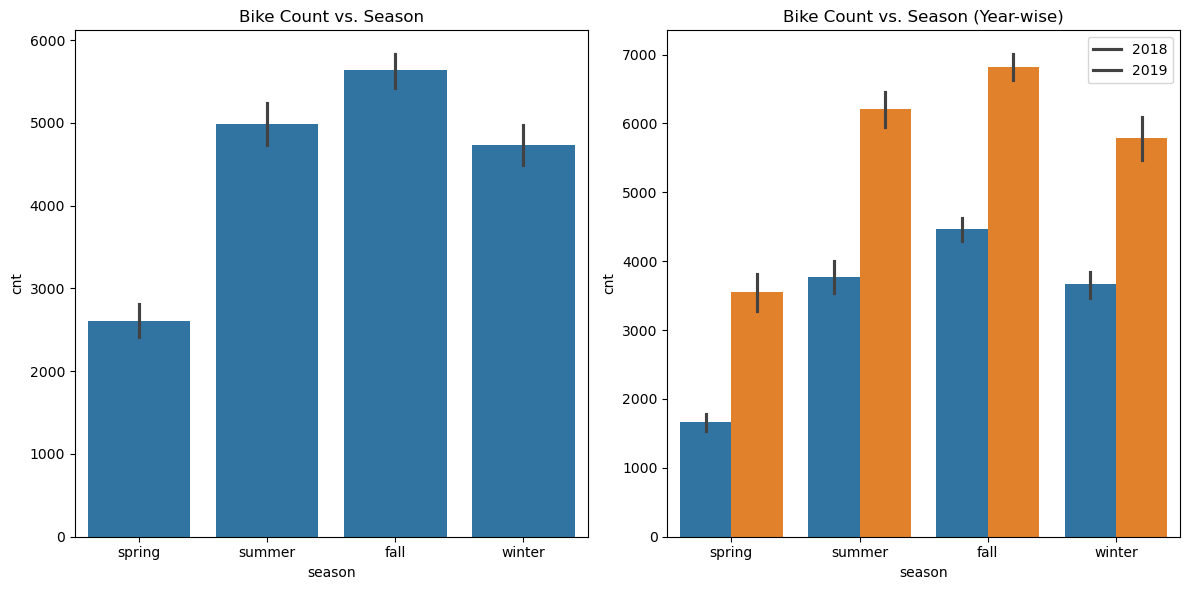

In [41]:
# plotting visualization for season column

plot_cat_columns('season')

><b>Insights:</b>

Fall season seems to have attracted more booking. And, in each season the booking count has increased drastically from 2018 to 2019.

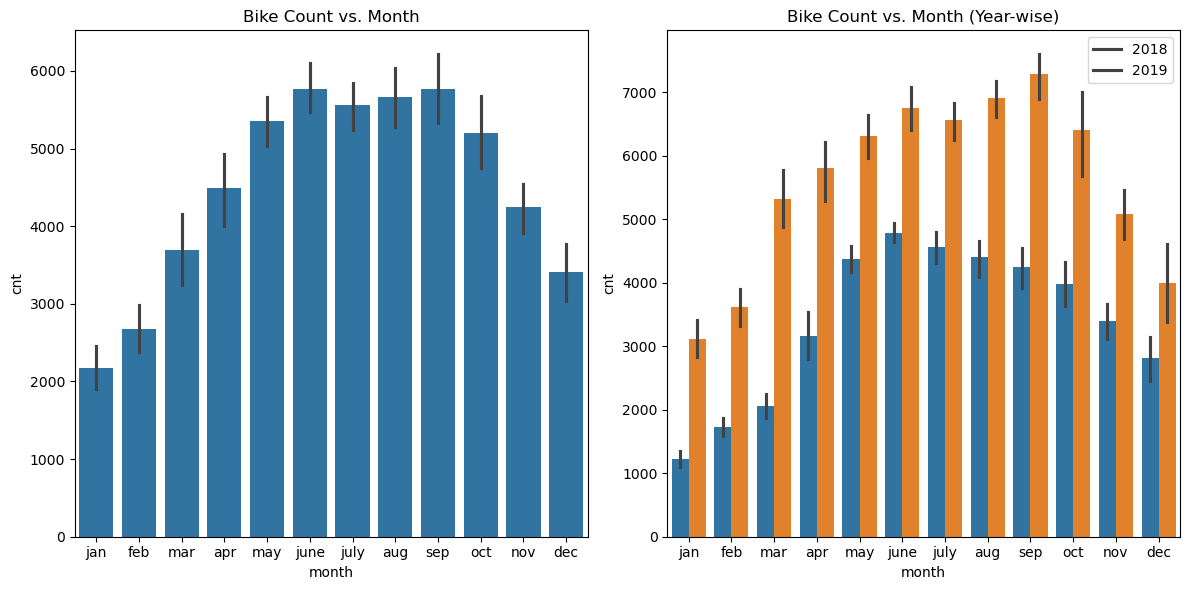

In [42]:
# plotting visualization for month column

plot_cat_columns('month')

><b> Insights:</b>

Most of the bookings has been done during the month of may, june, july, aug, sep and oct. Trend increased starting of the year till mid of the year and then it started decreasing as we approached the end of year. Number of booking for each month seems to have increased from 2018 to 2019.

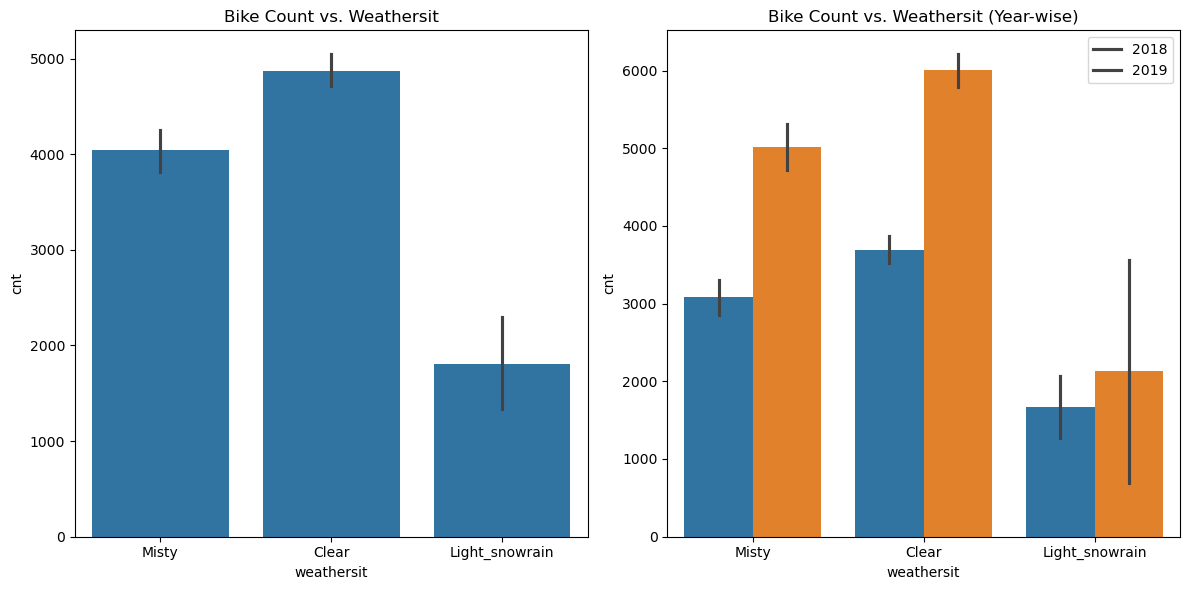

In [43]:
# plotting visualization for weathersit column

plot_cat_columns('weathersit')

><b>Insights:</b>

Clear weather attracted more booking which seems obvious. And in comparison to previous year, i.e 2018, booking increased for each weather situation in 2019

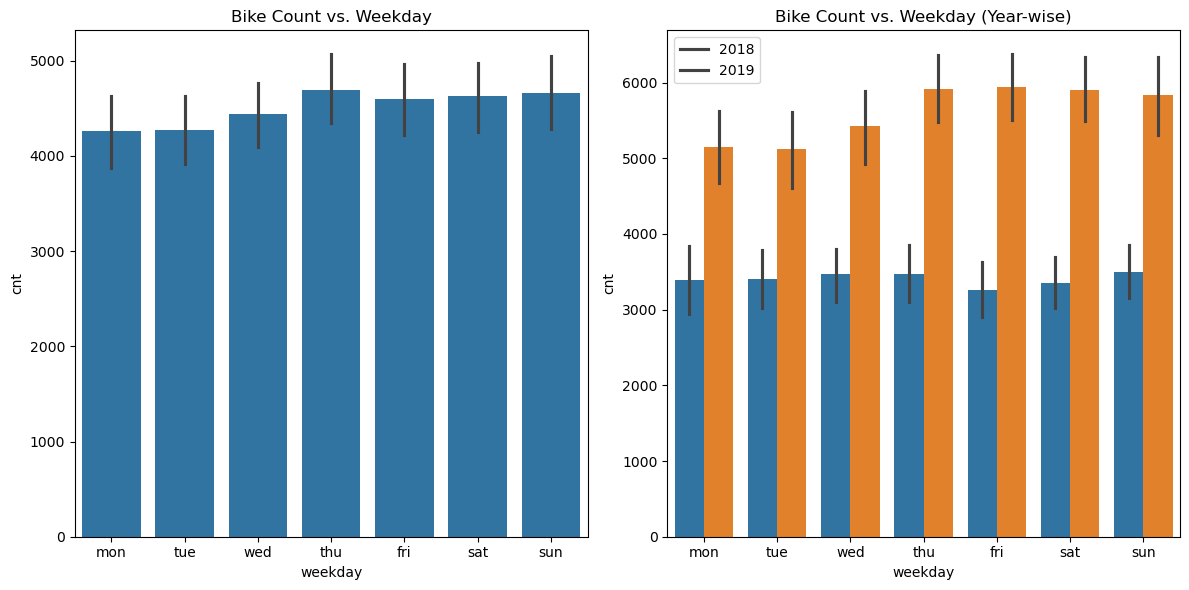

In [44]:
# plotting visualization for weekday column

plot_cat_columns('weekday')

><b>Insights:</b>

Thu, Fri, Sat and Sun have more number of bookings as compared to the start of the week

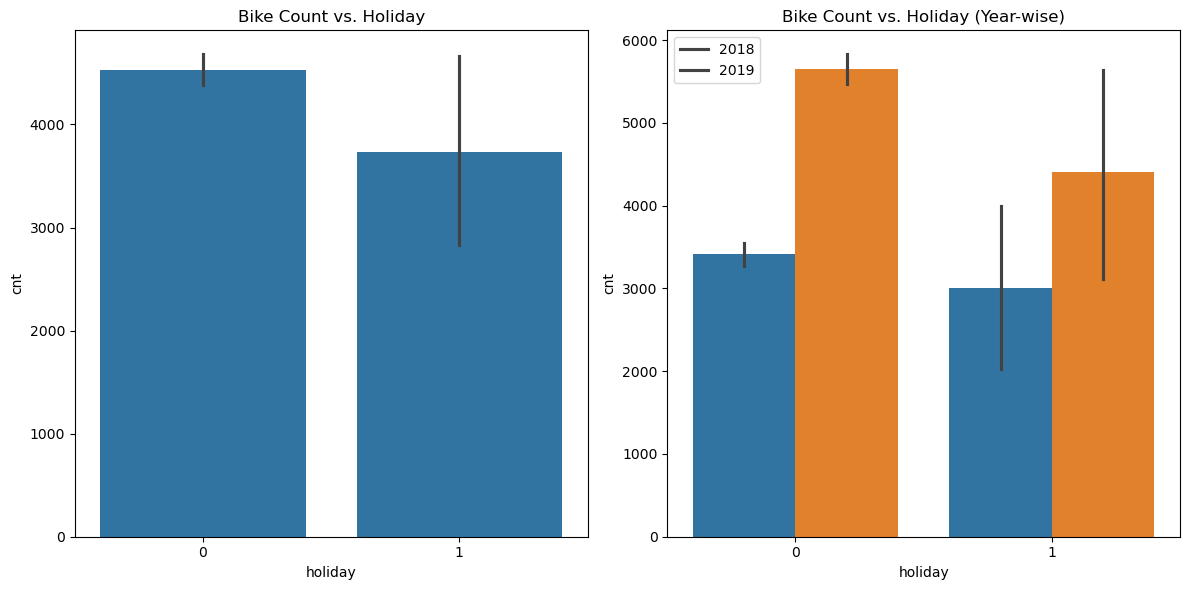

In [45]:
# plotting visualization for holiday column

plot_cat_columns('holiday')

><b>Insights:</b>

When its not holiday, booking seems to be less in number which seems reasonable as on holidays, people may want to spend time at home and enjoy with family.

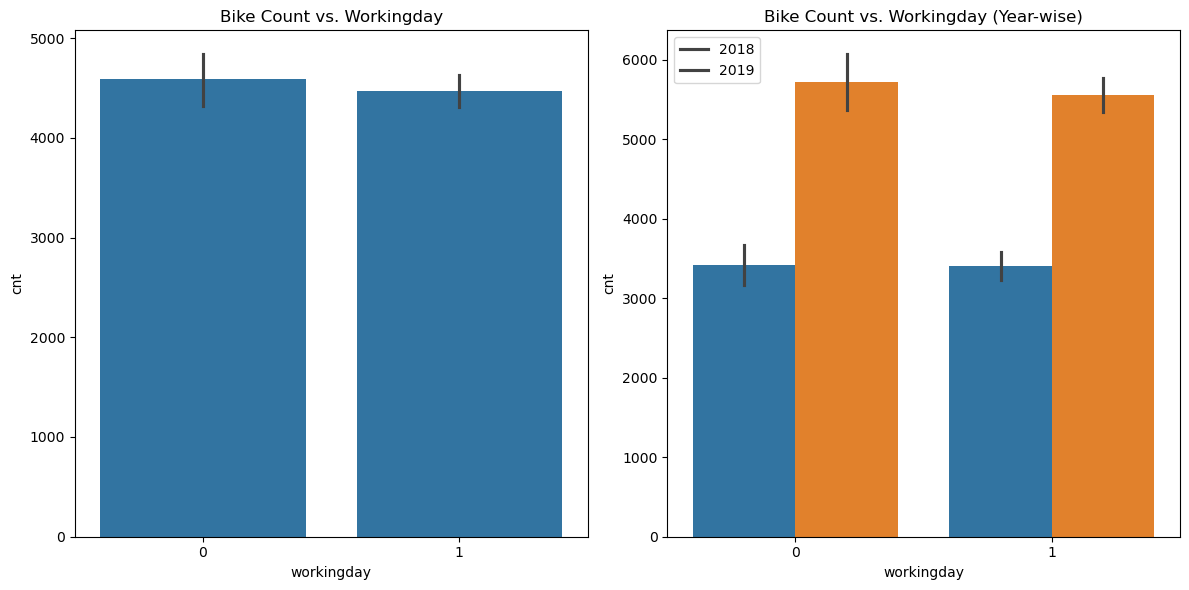

In [46]:
# plotting visualization for workingday column

plot_cat_columns('workingday')

><b>Insights:</b>

Booking seemed to be almost equal either on working day or non-working day. But, the count increased from 2018 to 2019.

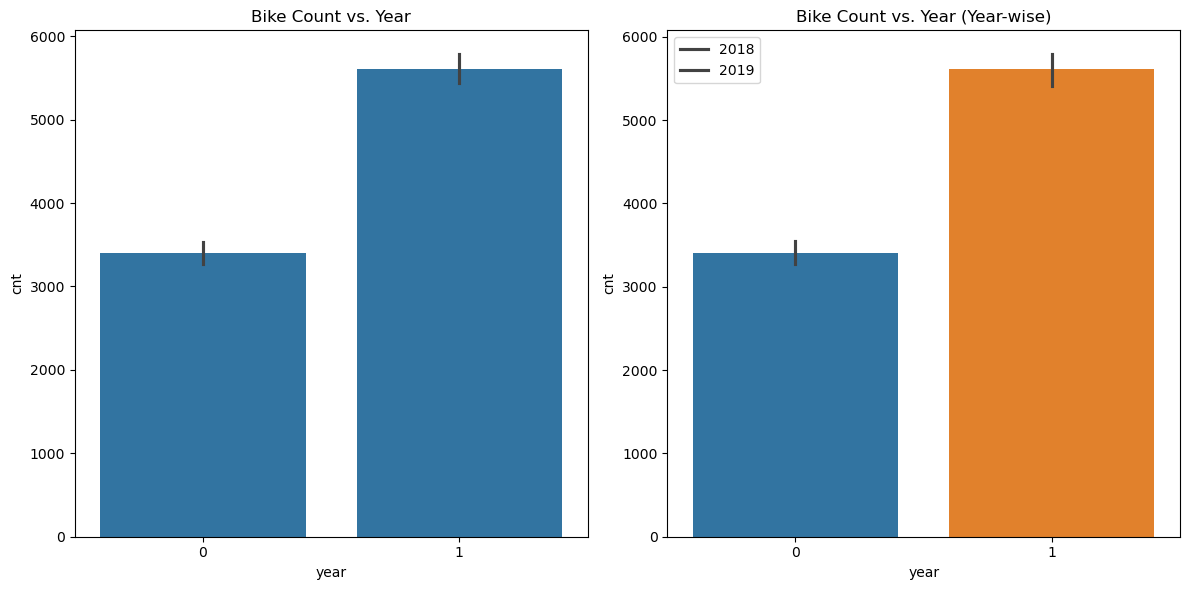

In [47]:
# plotting visualization for year column

plot_cat_columns('year')

><b>Insights:</b>

2019 attracted more number of booking from the previous year, which shows good progress in terms of business.

# 5. Data Preparation for Linear Regression

In [48]:
bikeSharing_df.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,days_old
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849,364.500000
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647,210.877136
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,182.250000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,364.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,546.750000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,729.000000


In [49]:
bikeSharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  days_old    730 non-null    int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 74.3+ KB


In [50]:
categorical_vars = ['season', 'month', 'weekday', 'weathersit']

# Create dummy variables
dummy_vars = pd.get_dummies(bikeSharing_df[categorical_vars], drop_first=True)  # drop_first=True to avoid multicollinearity

# Convert dummy variables to integers
dummy_vars = dummy_vars.astype(int)

# Concatenate dummy variables with the original DataFrame
bikeSharing_df = pd.concat([bikeSharing_df, dummy_vars], axis=1)

# Drop the original categorical variables if needed
bikeSharing_df.drop(categorical_vars, axis=1, inplace=True)

1. Dropping the first dummy out of 𝑝 total dummies can represent 𝑝 categories effectively.
2. The first column of 'weathersit' was preserved to retain information about severe weather conditions, preventing loss of critical data.

In [51]:
#Print columns after creating dummies
bikeSharing_df.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'cnt', 'days_old', 'season_spring', 'season_summer',
       'season_winter', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_july', 'month_june', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed',
       'weathersit_Light_snowrain', 'weathersit_Misty'],
      dtype='object')

In [52]:
bikeSharing_df.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,days_old,season_spring,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,0,0,0,0,0,0,0


# 6. Model Building

## 6.1 Splitting data into training and test dataset

In [53]:
# Checking shape before splitting
bikeSharing_df.shape

(730, 31)

In [54]:
#Train Test split with 70:30 ratio
# We need to specify 'random_state' so that the train and test data set always have the same rows, respectively

np.random.seed(0)
X_train,X_test = train_test_split(bikeSharing_df,train_size=0.7,test_size=0.3,random_state=1000)


In [55]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(510, 31)
(219, 31)


In [56]:
X_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,days_old,season_spring,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
544,1,0,0,34.200847,39.33065,48.8750,11.082939,5463,544,0,...,0,0,0,1,0,0,0,0,0,0
674,1,0,1,11.514153,14.07835,56.7083,11.625371,5686,674,0,...,0,0,0,0,0,0,0,1,0,0
477,1,0,1,13.188347,15.05625,76.6667,20.334232,3214,477,0,...,0,0,0,0,0,0,1,0,0,1
176,0,0,1,27.880000,31.88145,51.3333,6.333731,5305,176,0,...,0,0,0,0,0,0,1,0,0,0
655,1,0,1,21.422500,25.63125,72.8333,15.874779,7509,655,0,...,1,0,0,0,0,0,0,0,0,1


In [57]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 544 to 599
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       510 non-null    int64  
 1   holiday                    510 non-null    int64  
 2   workingday                 510 non-null    int64  
 3   temp                       510 non-null    float64
 4   atemp                      510 non-null    float64
 5   humidity                   510 non-null    float64
 6   windspeed                  510 non-null    float64
 7   cnt                        510 non-null    int64  
 8   days_old                   510 non-null    int64  
 9   season_spring              510 non-null    int32  
 10  season_summer              510 non-null    int32  
 11  season_winter              510 non-null    int32  
 12  month_aug                  510 non-null    int32  
 13  month_dec                  510 non-null    int32  
 1

In [58]:
X_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,days_old,season_spring,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
310,0,0,1,16.195000,20.04355,75.8750,3.834075,4035,310,0,...,0,0,0,0,0,0,0,1,0,0
320,0,0,0,14.008347,16.16105,57.5833,20.459254,3053,320,0,...,0,0,0,1,0,0,0,0,0,1
189,0,0,1,30.066653,33.20790,60.9167,11.250104,5336,189,0,...,0,0,1,0,0,0,0,0,0,0
382,1,0,1,12.436653,13.76270,44.3333,27.833743,3376,382,1,...,0,0,0,0,0,0,0,0,0,0
388,1,0,1,14.042500,17.45540,83.5833,8.292389,4339,388,1,...,0,0,0,0,0,1,0,0,0,0


In [59]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 310 to 460
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       219 non-null    int64  
 1   holiday                    219 non-null    int64  
 2   workingday                 219 non-null    int64  
 3   temp                       219 non-null    float64
 4   atemp                      219 non-null    float64
 5   humidity                   219 non-null    float64
 6   windspeed                  219 non-null    float64
 7   cnt                        219 non-null    int64  
 8   days_old                   219 non-null    int64  
 9   season_spring              219 non-null    int32  
 10  season_summer              219 non-null    int32  
 11  season_winter              219 non-null    int32  
 12  month_aug                  219 non-null    int32  
 13  month_dec                  219 non-null    int32  
 1

## 6.2 Feature Scaling

Making all features in same scale to interpret easily

In [60]:
# Importing required library
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

<b>Scaling Continous Variables

In [61]:
# Applying scaler() to all numeric variables except the 'dummy' variables

num_vars = ['temp','atemp','humidity','windspeed','cnt']

scaler = MinMaxScaler()

#Fit and transform training set only

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [62]:
X_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,days_old,season_spring,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
544,1,0,0,0.964059,0.926848,0.503649,0.294854,0.625978,544,0,...,0,0,0,1,0,0,0,0,0,0
674,1,0,1,0.240884,0.246245,0.584370,0.311545,0.651634,674,0,...,0,0,0,0,0,0,0,1,0,0
477,1,0,1,0.294252,0.272602,0.790039,0.579511,0.367234,477,0,...,0,0,0,0,0,0,1,0,0,1
176,0,0,1,0.762572,0.726076,0.528982,0.148724,0.607800,176,0,...,0,0,0,0,0,0,1,0,0,0
655,1,0,1,0.556729,0.557620,0.750536,0.442296,0.861367,655,0,...,1,0,0,0,0,0,0,0,0,1


In [63]:
X_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,days_old,season_spring,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.500000,0.025490,0.682353,0.522749,0.507177,0.650813,0.347478,0.514357,361.284314,0.24902,...,0.088235,0.068627,0.143137,0.149020,0.147059,0.131373,0.145098,0.141176,0.027451,0.347059
std,0.500491,0.157763,0.466018,0.239351,0.219530,0.145303,0.161325,0.220019,211.101451,0.43287,...,0.283915,0.253068,0.350557,0.356457,0.354512,0.338139,0.352545,0.348545,0.163554,0.476502
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.318212,0.323000,0.540738,0.232053,0.367234,175.250000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,0.522966,0.518051,0.655431,0.328844,0.513921,365.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.732894,0.690137,0.754508,0.435596,0.676542,537.750000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,729.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


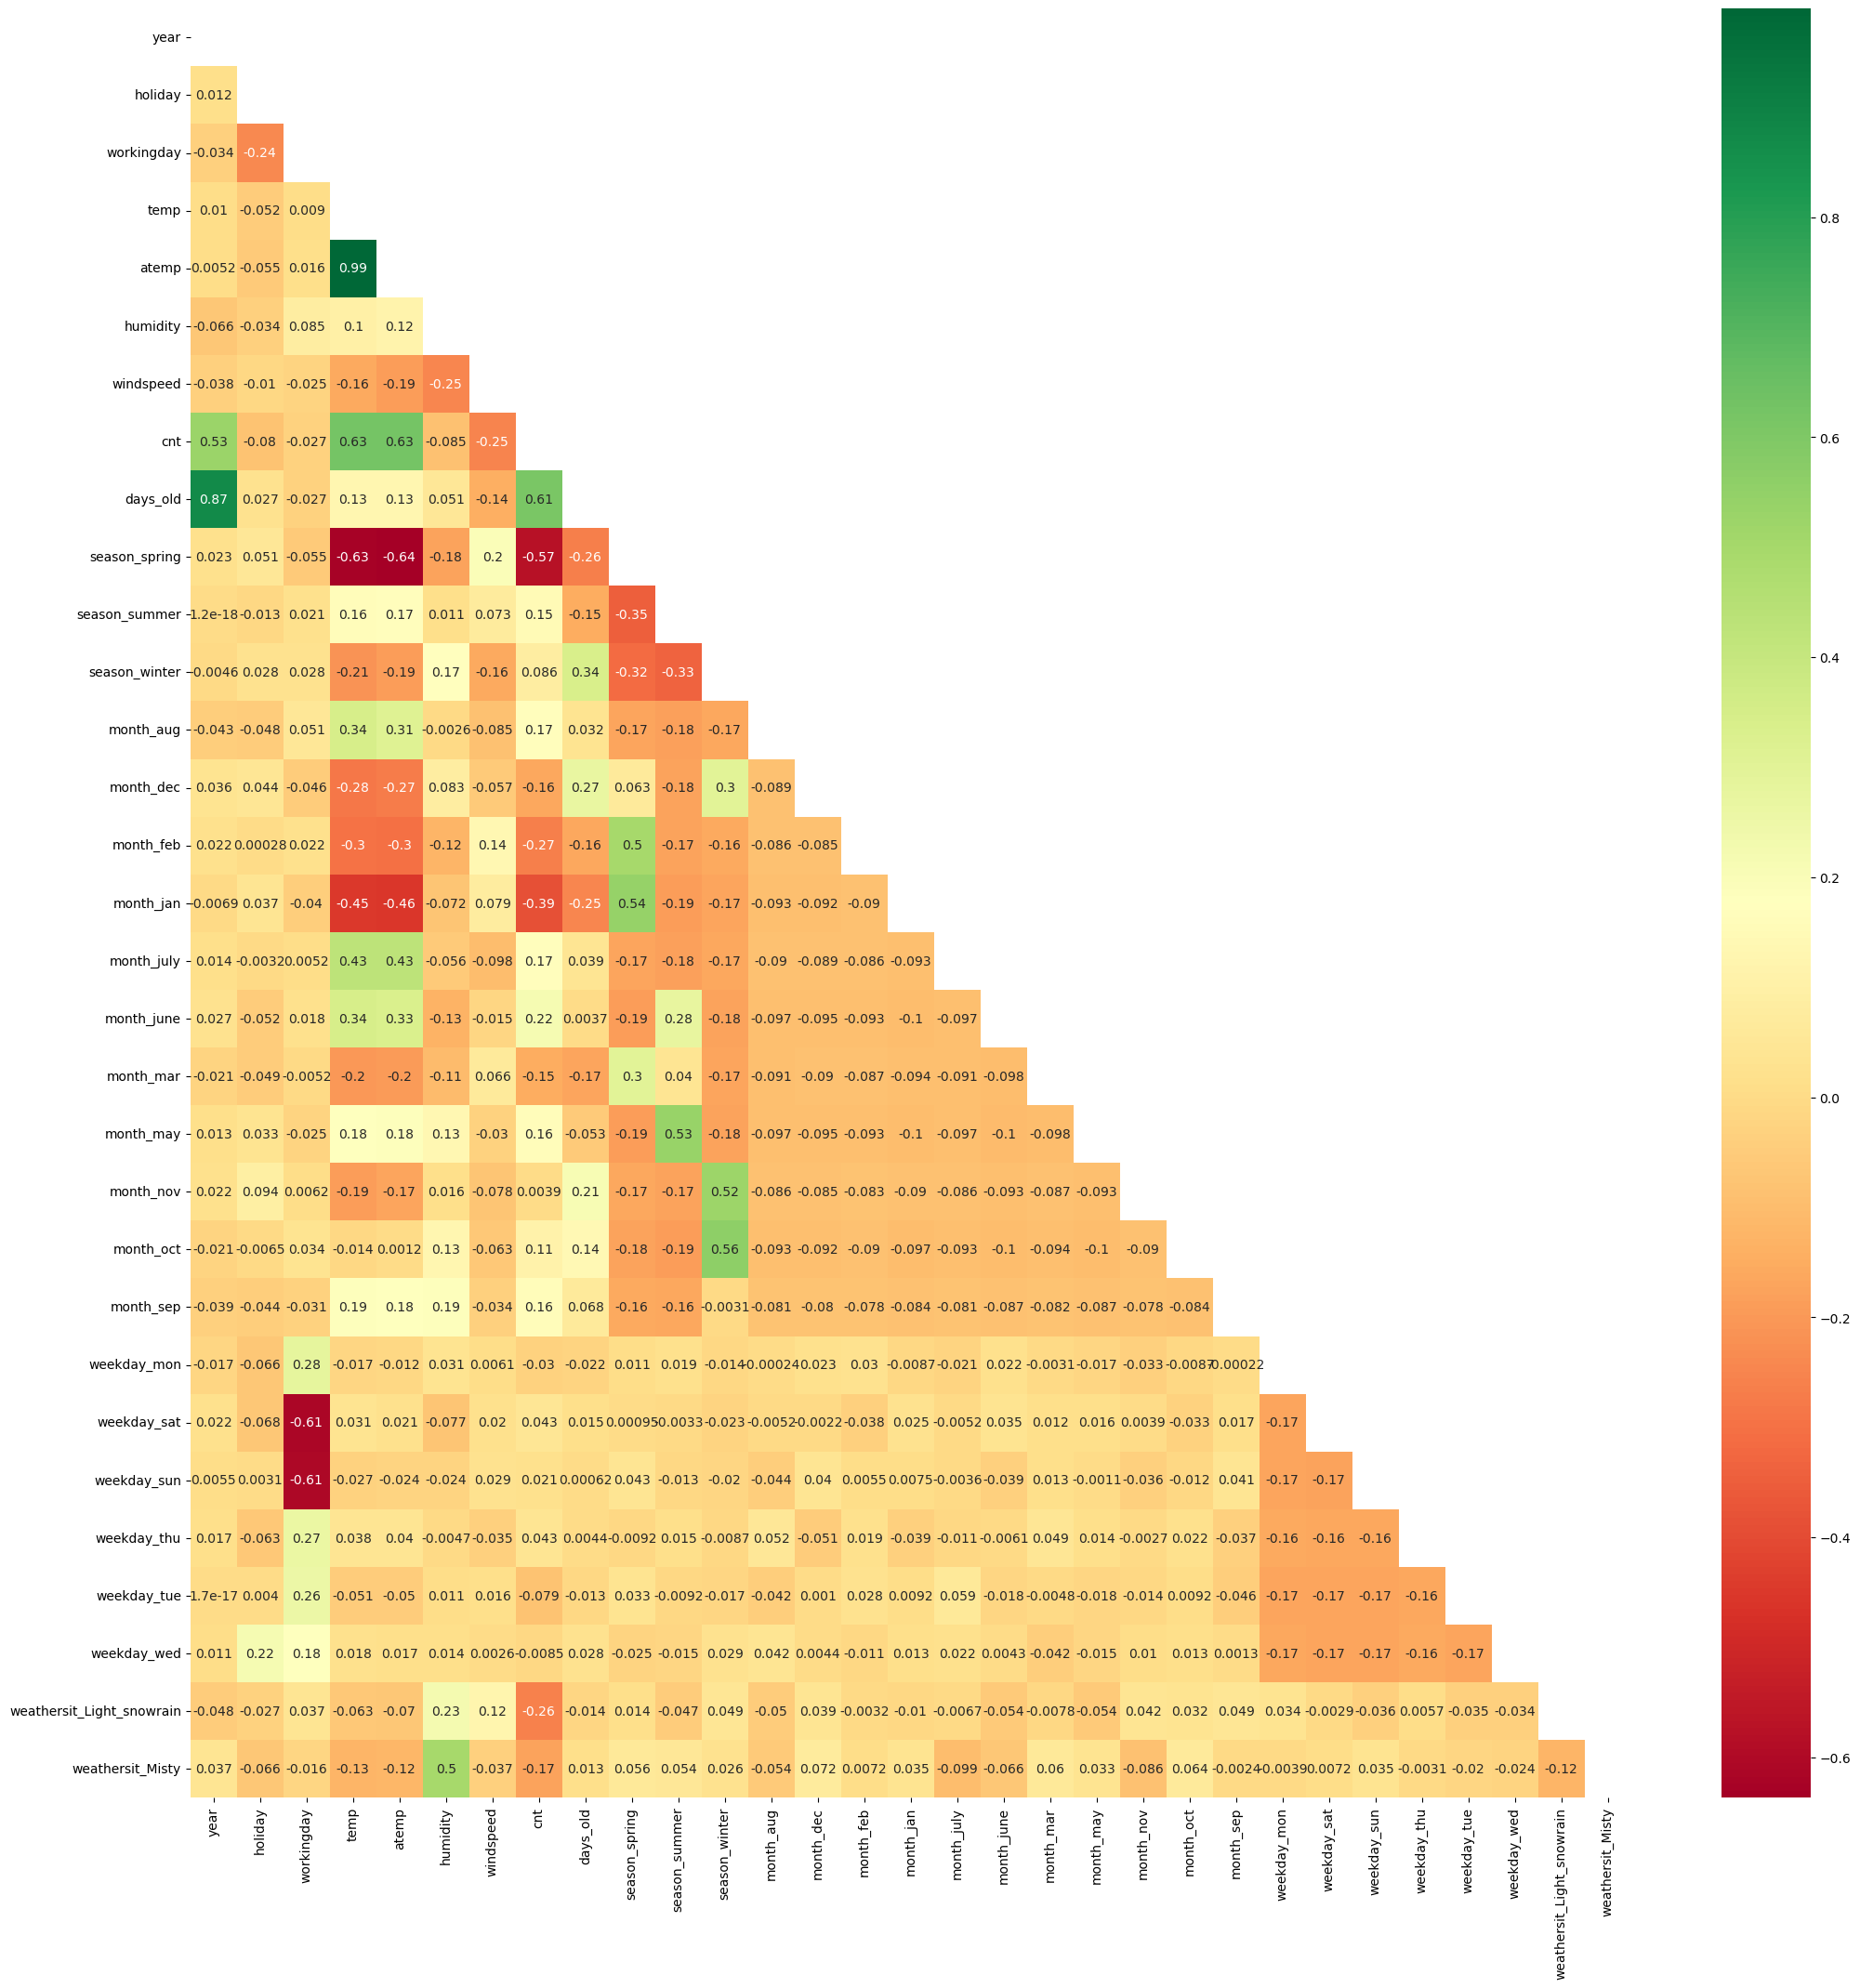

In [64]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
matrix = np.triu(X_train.corr())
sns.heatmap(X_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

><b>Insights:</b>
There is a notable correlation between the spring season and the months of January and February, the summer season and the month of May, and the winter season and the months of October and November.

# 7. Model Building using RFE and Automated Approach

In [65]:
# Dividing into X and Y sets for the model building

y_train = X_train.pop('cnt')

# Checking shape of y_train

y_train.shape

(510,)

## 7.1 Eliminating some columns using RFE

In [66]:
# Building a Lienar Regression model using SKLearn for RFE

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [67]:
#Cut down number of features to 15 using automated approach
rfe = RFE(lr,n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [68]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', False, 6),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('days_old', False, 16),
 ('season_spring', True, 1),
 ('season_summer', False, 15),
 ('season_winter', True, 1),
 ('month_aug', False, 10),
 ('month_dec', True, 1),
 ('month_feb', False, 5),
 ('month_jan', False, 4),
 ('month_july', True, 1),
 ('month_june', False, 11),
 ('month_mar', False, 12),
 ('month_may', False, 3),
 ('month_nov', False, 2),
 ('month_oct', False, 8),
 ('month_sep', True, 1),
 ('weekday_mon', False, 13),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 14),
 ('weekday_tue', False, 7),
 ('weekday_wed', False, 9),
 ('weathersit_Light_snowrain', True, 1),
 ('weathersit_Misty', True, 1)]

## 7.2 Manual Elimination

In [69]:
#Function to build a model using statsmodel api 

def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [70]:
#Function to calculate VIFs and print them 

def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [71]:
#Print Columns selected by RFE. 

X_train.columns[rfe.support_]

Index(['year', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'season_spring', 'season_winter', 'month_dec', 'month_july',
       'month_sep', 'weekday_sat', 'weekday_sun', 'weathersit_Light_snowrain',
       'weathersit_Misty'],
      dtype='object')

In [72]:
# Features not selected by RFE

X_train.columns[~rfe.support_]

Index(['holiday', 'days_old', 'season_summer', 'month_aug', 'month_feb',
       'month_jan', 'month_june', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'weekday_mon', 'weekday_thu', 'weekday_tue',
       'weekday_wed'],
      dtype='object')

In [73]:
# Taking 15 columns supported by RFE for regression

X_train_rfe = X_train[['year', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'season_spring', 'season_winter', 'month_dec', 'month_july',
       'month_sep', 'weekday_sat', 'weekday_sun', 'weathersit_Light_snowrain',
       'weathersit_Misty']]

In [74]:
X_train_rfe.shape

(510, 15)

In [75]:
X_train_not_rfe = X_train[['holiday', 'days_old', 'season_summer', 'month_aug', 'month_feb',
       'month_jan', 'month_june', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'weekday_mon', 'weekday_thu', 'weekday_tue',
       'weekday_wed']]

In [76]:
X_train_not_rfe.shape

(510, 15)

# 8. Building Model

## 8.1 Model 1 - Start with all variables selected by RFE

In [77]:
# Selected columns for Model 1 - all columns selected by RFE

build_model(X_train_rfe.columns)
get_vif(X_train_rfe.columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     165.0
Date:                Mon, 06 May 2024   Prob (F-statistic):          2.59e-181
Time:                        20:40:27   Log-Likelihood:                 506.36
No. Observations:                 510   AIC:                            -980.7
Df Residuals:                     494   BIC:                            -913.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

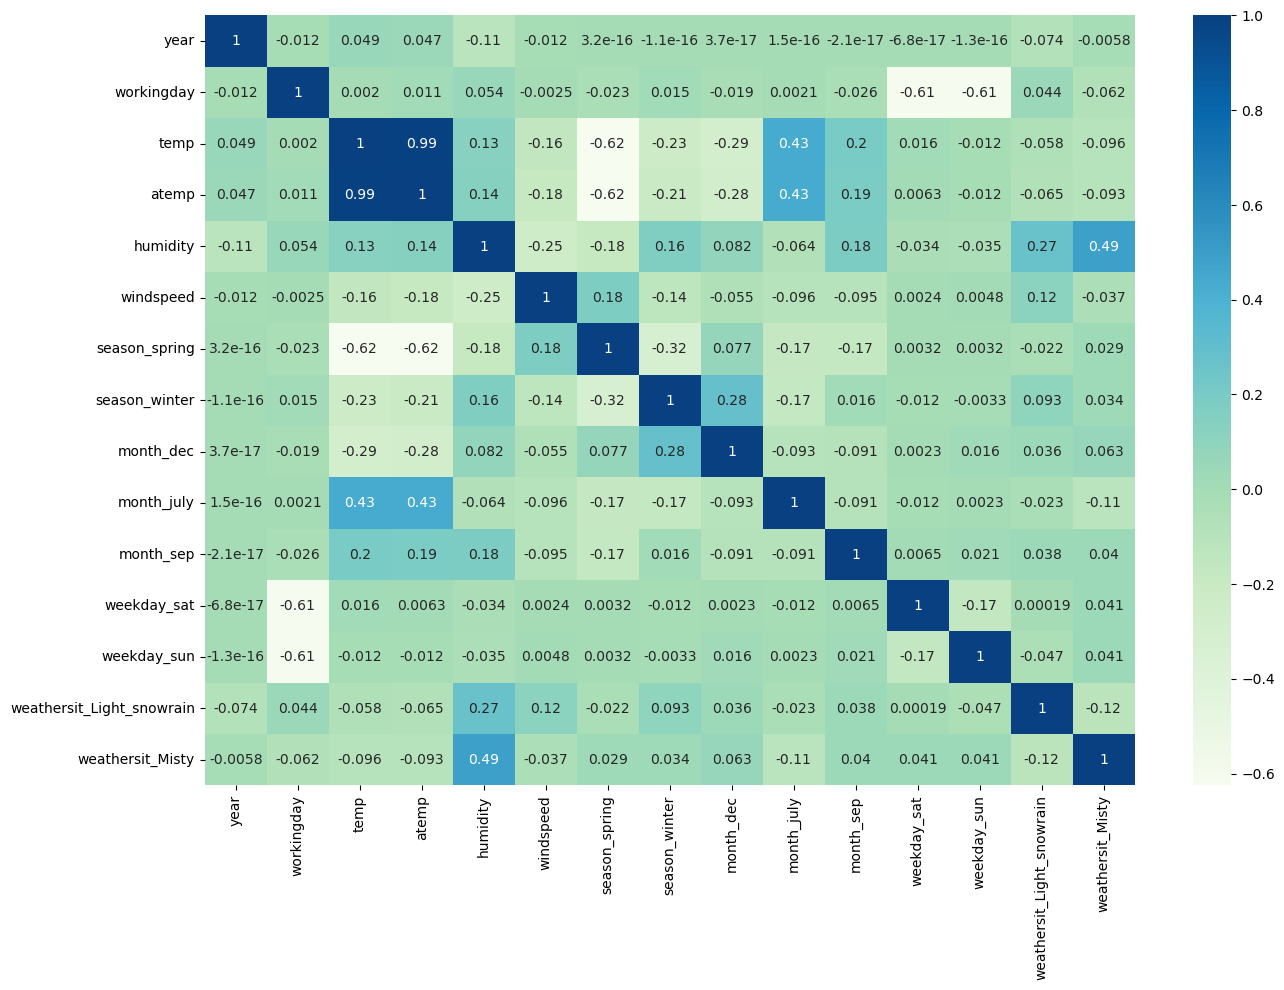

In [78]:
# Checking correlation of features selected by RFE with target column. 
# Also to check impact of different features on target.

plt.figure(figsize = (15,10))
sns.heatmap(bikeSharing_df[['year', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'season_spring', 'season_winter', 'month_dec', 'month_july',
       'month_sep', 'weekday_sat', 'weekday_sun', 'weathersit_Light_snowrain',
       'weathersit_Misty']].corr(), cmap='GnBu', annot=True)
plt.show()

## Model 2 
<h4><b>Dropping the 'atemp' column as it has high VIF

In [79]:
X_train_rfe2 = X_train_rfe.drop(["atemp"], axis = 1)

In [80]:
X_train_rfe2.columns

Index(['year', 'workingday', 'temp', 'humidity', 'windspeed', 'season_spring',
       'season_winter', 'month_dec', 'month_july', 'month_sep', 'weekday_sat',
       'weekday_sun', 'weathersit_Light_snowrain', 'weathersit_Misty'],
      dtype='object')

In [81]:
build_model(X_train_rfe2.columns)
get_vif(X_train_rfe2.columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     176.9
Date:                Mon, 06 May 2024   Prob (F-statistic):          2.52e-182
Time:                        20:40:32   Log-Likelihood:                 506.08
No. Observations:                 510   AIC:                            -982.2
Df Residuals:                     495   BIC:                            -918.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## Model 3

<h4><b>Deciding to drop 'humidity' due to high VIF 

In [82]:
X_train_rfe3 = X_train_rfe2.drop(["humidity"], axis = 1)

In [83]:
X_train_rfe3.columns

Index(['year', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_winter', 'month_dec', 'month_july', 'month_sep', 'weekday_sat',
       'weekday_sun', 'weathersit_Light_snowrain', 'weathersit_Misty'],
      dtype='object')

In [84]:
build_model(X_train_rfe3.columns)
get_vif(X_train_rfe3.columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     183.1
Date:                Mon, 06 May 2024   Prob (F-statistic):          9.29e-180
Time:                        20:40:33   Log-Likelihood:                 497.24
No. Observations:                 510   AIC:                            -966.5
Df Residuals:                     496   BIC:                            -907.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## Model 4

<h4><b>Deciding to drop 'workingday' as it has high VIF

In [85]:
X_train_rfe4 = X_train_rfe3.drop(["workingday"], axis = 1)

In [86]:
X_train_rfe4.columns

Index(['year', 'temp', 'windspeed', 'season_spring', 'season_winter',
       'month_dec', 'month_july', 'month_sep', 'weekday_sat', 'weekday_sun',
       'weathersit_Light_snowrain', 'weathersit_Misty'],
      dtype='object')

In [87]:
build_model(X_train_rfe4.columns)
get_vif(X_train_rfe4.columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     193.2
Date:                Mon, 06 May 2024   Prob (F-statistic):          2.14e-178
Time:                        20:40:33   Log-Likelihood:                 491.26
No. Observations:                 510   AIC:                            -956.5
Df Residuals:                     497   BIC:                            -901.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## Model 5
<h4><b>Deciding to drop 'weekday_sat' as it has high p-value

In [88]:
X_train_rfe5 = X_train_rfe4.drop(["weekday_sat"], axis = 1)

In [89]:
X_train_rfe5.columns

Index(['year', 'temp', 'windspeed', 'season_spring', 'season_winter',
       'month_dec', 'month_july', 'month_sep', 'weekday_sun',
       'weathersit_Light_snowrain', 'weathersit_Misty'],
      dtype='object')

In [90]:
build_model(X_train_rfe5.columns)
get_vif(X_train_rfe5.columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     210.0
Date:                Mon, 06 May 2024   Prob (F-statistic):          4.61e-179
Time:                        20:40:34   Log-Likelihood:                 490.06
No. Observations:                 510   AIC:                            -956.1
Df Residuals:                     498   BIC:                            -905.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## >Insights

1. The Model 5 looks pretty decent with p-values significant and very low multicollinearity between the predictor variables. p-vales for all features is almost 0.0
2. The R-squared and Adj. R-squared looks very good at 0.823 and 0.819 respectively. The difference between them is very less, meaning there are no additional parameters that can be removed from this model.
3. F-static is also large, stating a good fit of model.
   
We will check the test data metrics to check whether this model is significant enough or not.

In [91]:
#Residual Analysis of the train data(Error terms are normally distributed with mean zero)

#Build a model with all columns to select features automatically

def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [92]:
#Let us build the finalmodel using sklearn
cols = ['year', 'temp', 'windspeed', 'season_spring', 'season_winter','month_dec','month_july', 
         'month_sep', 'weekday_sun', 'weathersit_Light_snowrain', 'weathersit_Misty']

#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

0.26794535996960556 [ 0.23202191  0.42326139 -0.11406632 -0.11825041  0.0626042  -0.05193707
 -0.06745346  0.04631162  0.02651196 -0.29257232 -0.07404831]


# 8. Model Evaluation

## 8.1 Residual Analysis

In [93]:
y_train_pred = lr.predict(X_train[cols])

In [94]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

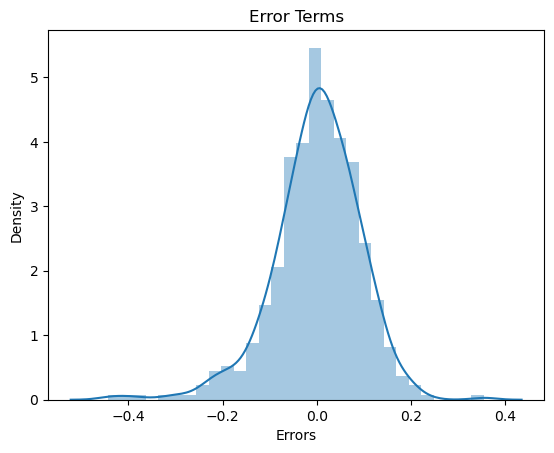

In [95]:
plot_res_dist(y_train, y_train_pred)

><b>Insights:</b>
Errors are normally distribured here with mean 0. So everything seems to be fine

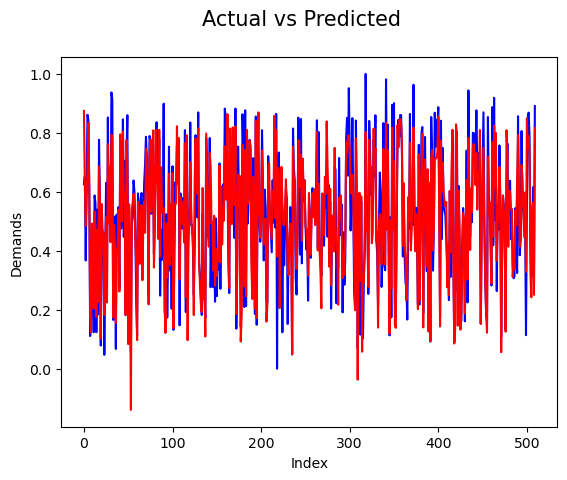

In [96]:
# Actual vs Predicted

c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

> <b>Insights:</b> Actual and Predicted result following almost the same pattern so this model seems ok


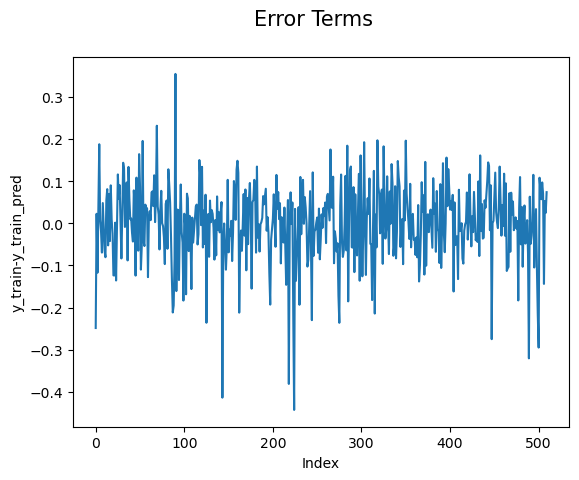

In [97]:
# Error Terms

c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

<b>Here, we see if the error terms are independent of each other.

In [98]:
#Print R-squared Value

r2_score(y_train,y_train_pred)

0.8226508307688211

> <b>Insight:</b>

R2 Same as we obtained for our final model, i.e model 5

## 8.2 Linearity Check

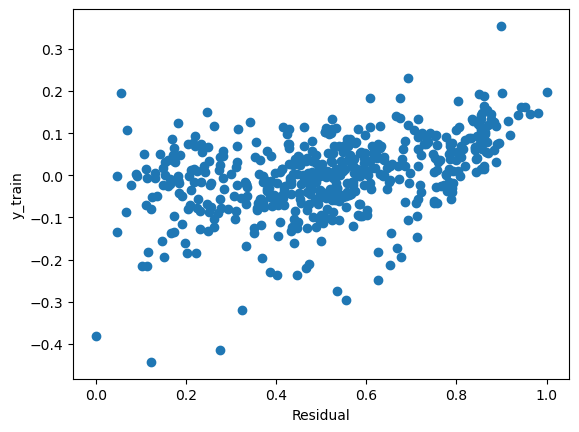

In [99]:
# scatter plot for the check

residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

## 8.3 Predict values for test data set

In [100]:
#Scale variables in X_test
num_vars = ['temp','atemp','humidity','windspeed','cnt']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [101]:
#Columns from our final model
cols = ['year', 'temp', 'windspeed', 'season_spring', 'season_winter','month_dec','month_july', 
         'month_sep', 'weekday_sun', 'weathersit_Light_snowrain', 'weathersit_Misty']

#Predict the values for test data
y_test_pred = lr.predict(X_test[cols])

## 8.4 R-Squared value for test predictions

In [102]:
y_test = X_test.pop('cnt')
y_test

310    0.461689
320    0.348711
189    0.611367
382    0.385872
388    0.496664
         ...   
436    0.670156
657    0.928210
606    0.884837
417    0.546595
460    0.740681
Name: cnt, Length: 219, dtype: float64

In [103]:
# Finding out the R squared value between test and predicted test data sets.  

r2_score(y_test,y_test_pred)

0.8286774040109461

## 8.4 Homoscedacity

> <b>Insights:</b>

R2 value for predictions on test data (0.828) is almost same as R2 value of train data(0.822). This is a good R-squared value, hence we can see our model is performing good even on unseen data (test data).

Text(0, 0.5, 'y_test_pred')

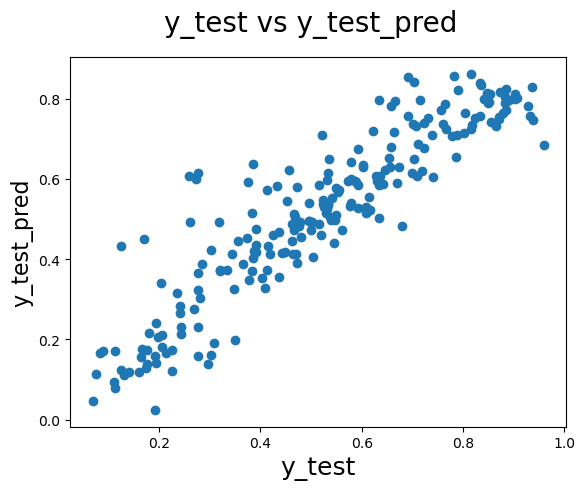

In [104]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

> <b>Insights:</b>

We can observe that variance of the residuals (error terms) is constant across predictions. i.e error term does not vary much as the value of the predictor variable changes.

## 8.5 Plot Test vs Predicted test values

In [105]:
#Function to plot Actual vs Predicted

#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data

def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+ dataname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)                               # Y-label

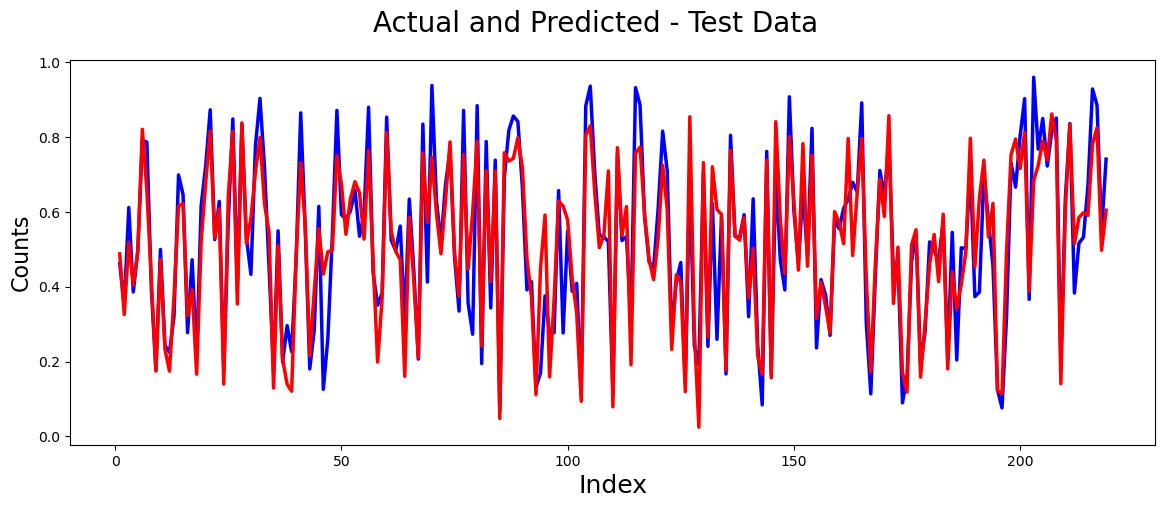

In [106]:
#Plot Actual vs Predicted for Test Data

plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

> <b>Insights:</b>

As we can see predictions for test data is very close to actuals

## 8.6 Plot Error Terms for test data

In [107]:
# Error terms

def plot_err_terms(act,pred):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                      # X-label
    plt.ylabel('Counts - Predicted Counts', fontsize=16)                # Y-label

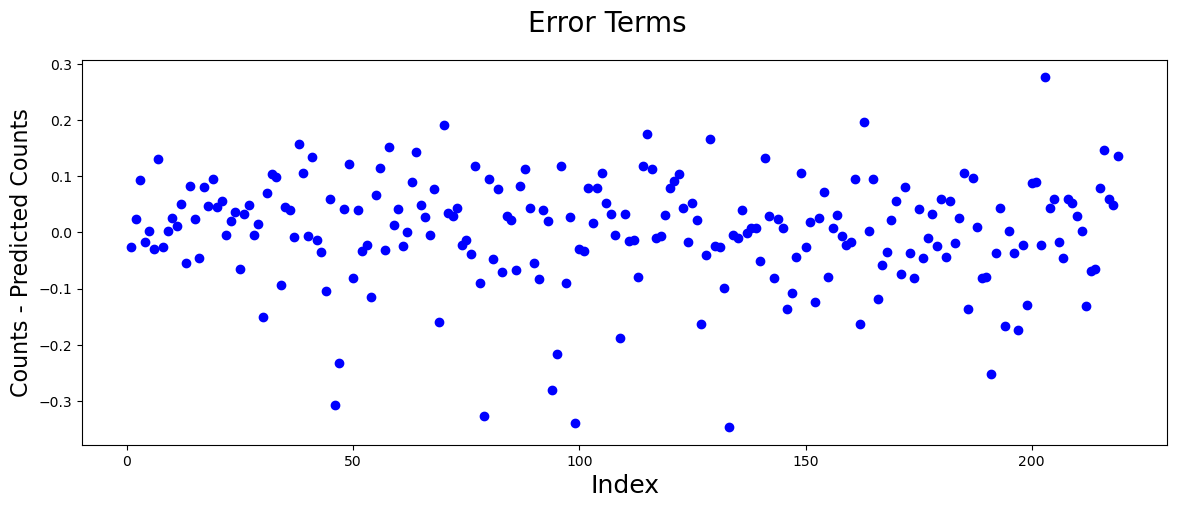

In [108]:
#Plot error terms for test data
plot_err_terms(y_test,y_test_pred)

><b>Insights:</b>

As we can see the error terms are randomly distributed and there is no pattern which means the output is explained well by the model and there are no other parameters that can explain the model better.

# 9. Making Predictions

In [109]:
# Checking data before scaling

bikeSharing_df.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,days_old,season_spring,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,0,0,0,0,0,0,0


## 9.1 Intrepretting the Model

Interpretting the RFE with Manual model results as we give more importance to imputation

In [110]:
# Rebuilding the final model of manual + rfe approach using statsmodel to interpret it

cols = ['year', 'temp', 'windspeed', 'season_spring', 'season_winter','month_dec','month_july', 
         'month_sep', 'weekday_sun', 'weathersit_Light_snowrain', 'weathersit_Misty']

lm = build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     210.0
Date:                Mon, 06 May 2024   Prob (F-statistic):          4.61e-179
Time:                        20:40:42   Log-Likelihood:                 490.06
No. Observations:                 510   AIC:                            -956.1
Df Residuals:                     498   BIC:                            -905.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

# Interpretation of Results

### Analysing the above model, the company should focus on the following features:

1. The company's growth strategy should prioritize expanding its operations during the spring season, capitalizing on the favorable weather and increased outdoor activities.
2. 
September presents an opportune time for the company to intensify its business expansion efforts, leveraging the peak demand and favorable market conditions characteristic of this month
3. 
During periods of light snow or rain, there is anticipated to be a decline in bookings. This downtime can be utilized by the company for bike servicing activities, minimizing the impact on business operation
4. .
Following the return to normalcy, the company should roll out new promotional offers tailored to the spring season, taking advantage of the pleasant weather conditions to attract custome
5. s. Additionally, targeted advertising efforts should be directed towards September, maximizing business opportunities during this peak period.
   
### Conclusion

>Significant variables to predict the demand for share bikes:s

1. holiday
2. temp
3. humidity
4. windspeed
5. Season
6. months
7. Year 
8. Sunday
9. weathersit